In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Will need to be adjusted as needed.
df = pd.read_csv(r'C:\Users\Patrick Robison\Documents\Business Documents\Portfolio Projects\911.csv')

In [2]:
# Viewing data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
# Rows vs Columns
df.shape

(663522, 9)

In [4]:
# File info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
# Using this cell we can see the percentage of missing or null data.
df.isnull().sum()/len(df)

lat          0.000000
lng          0.000000
desc         0.000000
zip          0.120869
title        0.000000
timeStamp    0.000000
twp          0.000442
addr         0.000000
e            0.000000
dtype: float64

In [6]:
# If we want the numbers we can use this.
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [7]:
# We can get more insights into our data using describe.
# Here I set the format to two decimal places so as to not take up as much space.
# The maximum and minimum values can let us see potential outliers.
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,lat,lng,zip,e
count,663522.00,663522.00,583323.00,663522.00
mean,40.16,-75.30,19236.06,1.00
std,0.22,1.67,298.22,0.00
min,0.00,-119.70,1104.00,1.00
25%,40.10,-75.39,19038.00,1.00
50%,40.14,-75.31,19401.00,1.00
75%,40.23,-75.21,19446.00,1.00
max,51.34,87.85,77316.00,1.00


In [8]:
# Data Preparation

In [9]:
# We'll use an array in order to change the names of the columns for readability.
df = pd.read_csv(r'C:\Users\Patrick Robison\Documents\Business Documents\Portfolio Projects\911.csv')
column = ['Latitude', 'Longitude', 'Description', 'Zipcode', 'Title', 'Timestamp'
          , 'Township', 'Address', 'e']
df.columns = column
df.head()

,Latitude,Longitude,Description,Zipcode,Title,Timestamp,Township,Address,e
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [10]:
# Removing the irrelevant row: e.
df.drop(['e'], axis=1, inplace=True)
df.head()

,Latitude,Longitude,Description,Zipcode,Title,Timestamp,Township,Address
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [11]:
# We can break up columns into substrings using split.
df['StationNumber'] = df.Description.str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
df.head()

,Latitude,Longitude,Description,Zipcode,Title,Timestamp,Township,Address,StationNumber
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329


In [12]:
# As we have access to most of the information in the description, we will remove this column too.
df.drop(['Description'], axis=1, inplace=True)

In [13]:
df.head()

,Latitude,Longitude,Zipcode,Title,Timestamp,Township,Address,StationNumber
0,40.30,-75.58,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332
1,40.26,-75.26,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345
2,40.12,-75.35,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27
3,40.12,-75.34,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A
4,40.25,-75.60,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329


In [14]:
# Data Visualization

In [15]:
# What are the top ten stations by call volume?
df['StationNumber'].value_counts()

StationNumber
 308A     25346
 329      21895
 313      20325
 381      15949
 345      14504
          ...  
 03RAD        1
              1
:FIRE         1
:56FD         1
:56           1
Name: count, Length: 139, dtype: int64

Text(0, 0.5, 'Count')

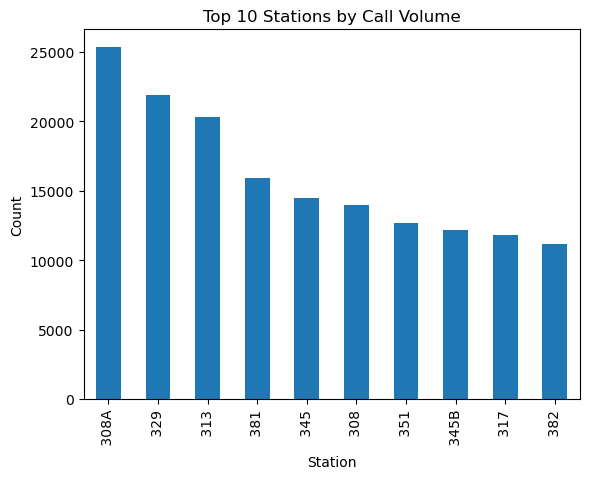

In [16]:
# Let's start by making some bar charts
ax = df['StationNumber'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Stations by Call Volume')
ax.set_xlabel('Station')
ax.set_ylabel('Count')

In [17]:
# How many stations are there?
print(df.StationNumber.nunique())

139


In [18]:
# The same analysis for Zipcode.
print(df.Zipcode.nunique())  # Will return the number of unique zipcodes.
df['Zipcode'].value_counts()

204


Zipcode
19401.00    45606
19464.00    43910
19403.00    34888
19446.00    32270
19406.00    22464
            ...  
77316.00        1
19134.00        1
19135.00        1
8502.00         1
18938.00        1
Name: count, Length: 204, dtype: int64

Text(0, 0.5, 'Count')

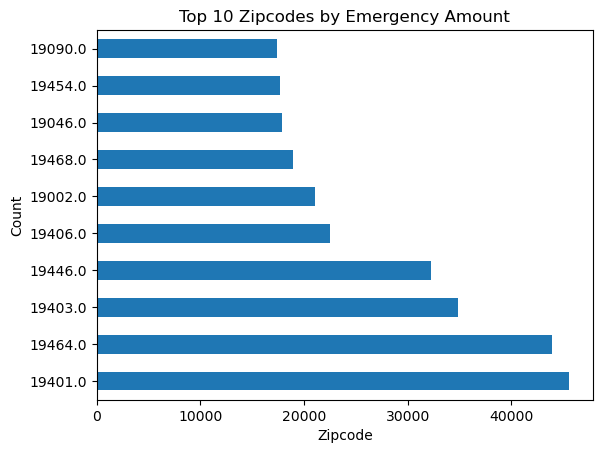

In [19]:
ax = df['Zipcode'].value_counts() \
    .head(10) \
    .plot(kind='barh', title='Top 10 Zipcodes by Emergency Amount')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Count')

In [20]:
# The same analysis for emergency title.
print(df.Title.nunique())
df['Title'].value_counts()

148


Title
Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
                                ...  
EMS: DISABLED VEHICLE               1
Fire: PRISONER IN CUSTODY           1
Fire: GENERAL WEAKNESS              1
Fire: SUSPICIOUS                    1
Fire: BARRICADED SUBJECT            1
Name: count, Length: 148, dtype: int64

Text(0, 0.5, 'Count')

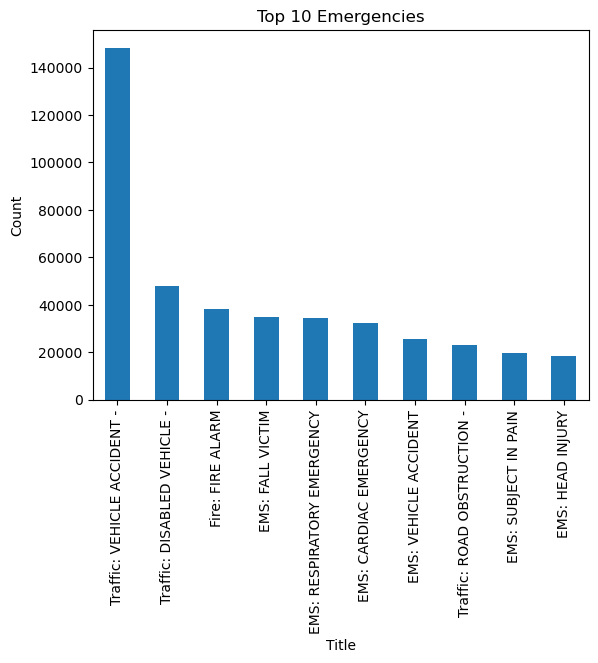

In [21]:
ax = df['Title'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Emergencies')
ax.set_xlabel('Title')
ax.set_ylabel('Count')

In [22]:
# Further categorizing the data by breaking up the title column.
df['Service'] = df.Title.str.split(':', expand=True)[0]
df['Reason'] = df.Title.str.split(':', expand=True)[1].str.replace(' -', '')

In [23]:
df.head()

,Latitude,Longitude,Zipcode,Title,Timestamp,Township,Address,StationNumber,Service,Reason
0,40.30,-75.58,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY
1,40.26,-75.26,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY
2,40.12,-75.35,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27,Fire,GAS-ODOR/LEAK
3,40.12,-75.34,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY
4,40.25,-75.60,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS


In [24]:
# What are the amount of emergencies based on the service?
df['Service'].value_counts()

Service
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

<Axes: xlabel='Service', ylabel='count'>

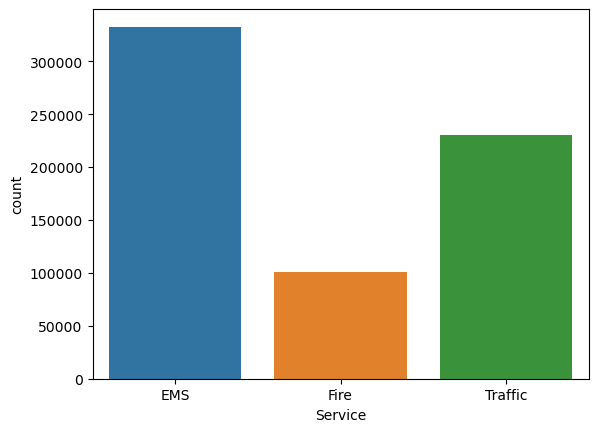

In [25]:
# We can also use Seaborn plots to get an idea.
sns.countplot(x=df.Service, data=df)

In [26]:
# Let's get better insights as to when these incidents occur.

In [27]:
# Currently this will throw an error, so we need to convert this column to the date format.
# df['DayOfWeek'] = df.Timestamp.dt.weekday
# df['Hour'] = df.Timestamp.dt.hour
# df['Month'] = df.Timestamp.dt.month

In [28]:
# Conversion
df['Timestamp'] = pd.to_datetime(df.Timestamp)

In [29]:
df['DayOfWeek'] = df.Timestamp.dt.weekday
df['Hour'] = df.Timestamp.dt.hour
df['Month'] = df.Timestamp.dt.month

In [30]:
df.head()

,Latitude,Longitude,Zipcode,Title,Timestamp,Township,Address,StationNumber,Service,Reason,DayOfWeek,Hour,Month
0,40.30,-75.58,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY,3,17,12
1,40.26,-75.26,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY,3,17,12
2,40.12,-75.35,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27,Fire,GAS-ODOR/LEAK,3,14,12
3,40.12,-75.34,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY,3,16,12
4,40.25,-75.60,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS,3,16,12


In [31]:
# Currently our days of the week are formatted as integers, but we can format them as strings using a map which will perform
# a function based on the iterables within.
weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['DayOfWeek'] = df.DayOfWeek.map(weekmap)
df.head()

,Latitude,Longitude,Zipcode,Title,Timestamp,Township,Address,StationNumber,Service,Reason,DayOfWeek,Hour,Month
0,40.30,-75.58,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY,Thu,17,12
1,40.26,-75.26,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY,Thu,17,12
2,40.12,-75.35,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27,Fire,GAS-ODOR/LEAK,Thu,14,12
3,40.12,-75.34,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY,Thu,16,12
4,40.25,-75.60,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS,Thu,16,12


<Axes: xlabel='DayOfWeek', ylabel='count'>

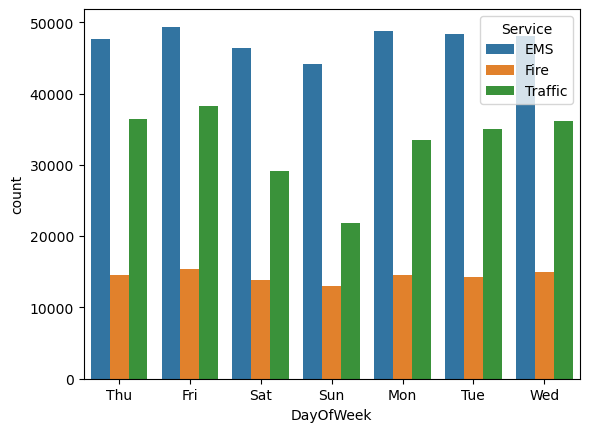

In [32]:
# Using Seaborn we can get an idea of the frequency of service based on time/day/month factors.
sns.countplot(x=df.DayOfWeek, data=df, hue='Service')

<Axes: xlabel='Hour', ylabel='count'>

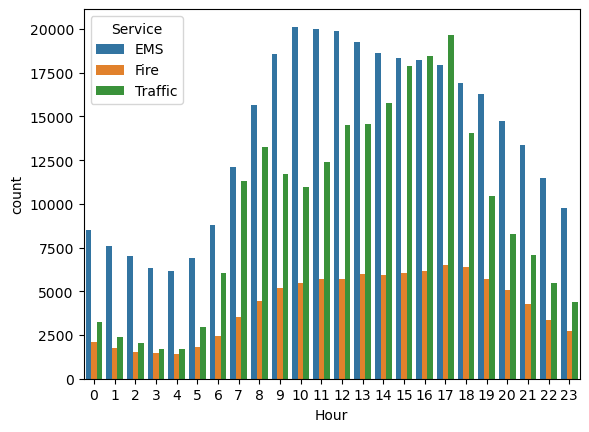

In [33]:
sns.countplot(x=df.Hour, data=df, hue='Service')

<Axes: xlabel='Month', ylabel='count'>

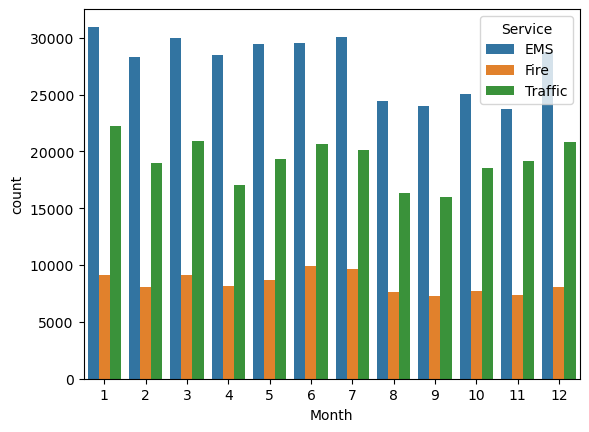

In [34]:
sns.countplot(x=df.Month, data=df, hue='Service')

In [35]:
# Next, let's try to get a timeline of all of our data. We can do this by creating a new date column from our timestamp
# column.
df['Date'] = df.Timestamp.dt.date
df.Date

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: Date, Length: 663522, dtype: object

In [36]:
# We will use groupby in order to get an aggregate on each day.
byDate = df.groupby("Date").count()
byDate.head()

,Latitude,Longitude,Zipcode,Title,Timestamp,Township,Address,StationNumber,Service,Reason,DayOfWeek,Hour,Month
Date,,,,,,,,,,,,,
2015-12-10,114,114,100,114,114,114,114,73,114,114,114,114,114
2015-12-11,391,391,332,391,391,391,391,254,391,391,391,391,391
2015-12-12,402,402,334,402,402,402,402,257,402,402,402,402,402
2015-12-13,316,316,279,316,316,316,316,241,316,316,316,316,316
2015-12-14,444,444,386,444,444,443,444,260,444,444,444,444,444


In [37]:
df['Date'].value_counts()

Date
2018-03-02    2187
2018-11-15    1662
2020-06-03    1401
2018-03-07     920
2018-03-03     917
              ... 
2020-07-29     217
2020-03-29     204
2020-03-28     184
2016-05-01     136
2015-12-10     114
Name: count, Length: 1694, dtype: int64

<Axes: xlabel='Date'>

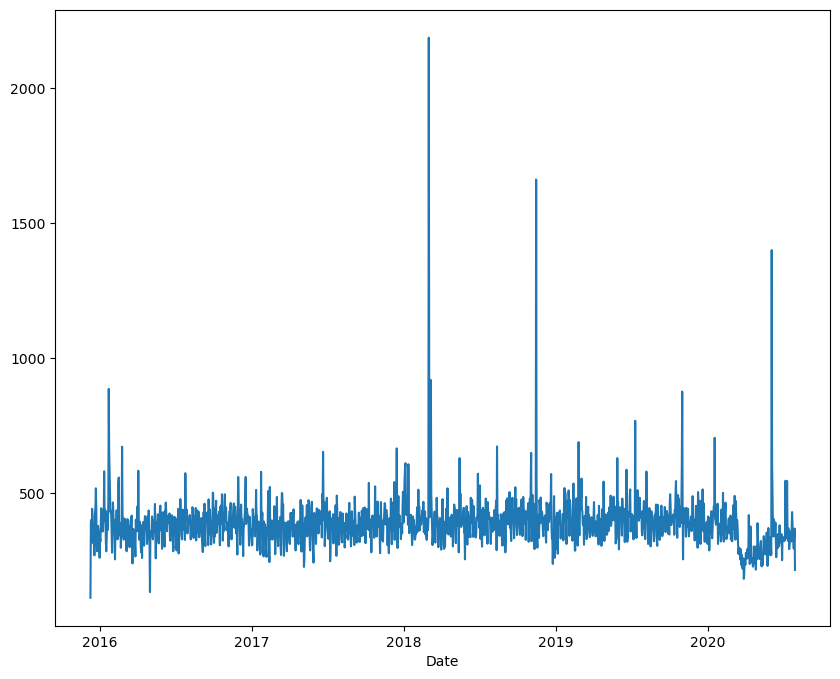

In [38]:
byDate.Township.plot(figsize=(10, 8))

C:\Users\Patrick Robison\AppData\Local\Temp\ipykernel_23668\525341455.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Patrick Robison\AppData\Local\Temp\ipykernel_23668\525341455.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


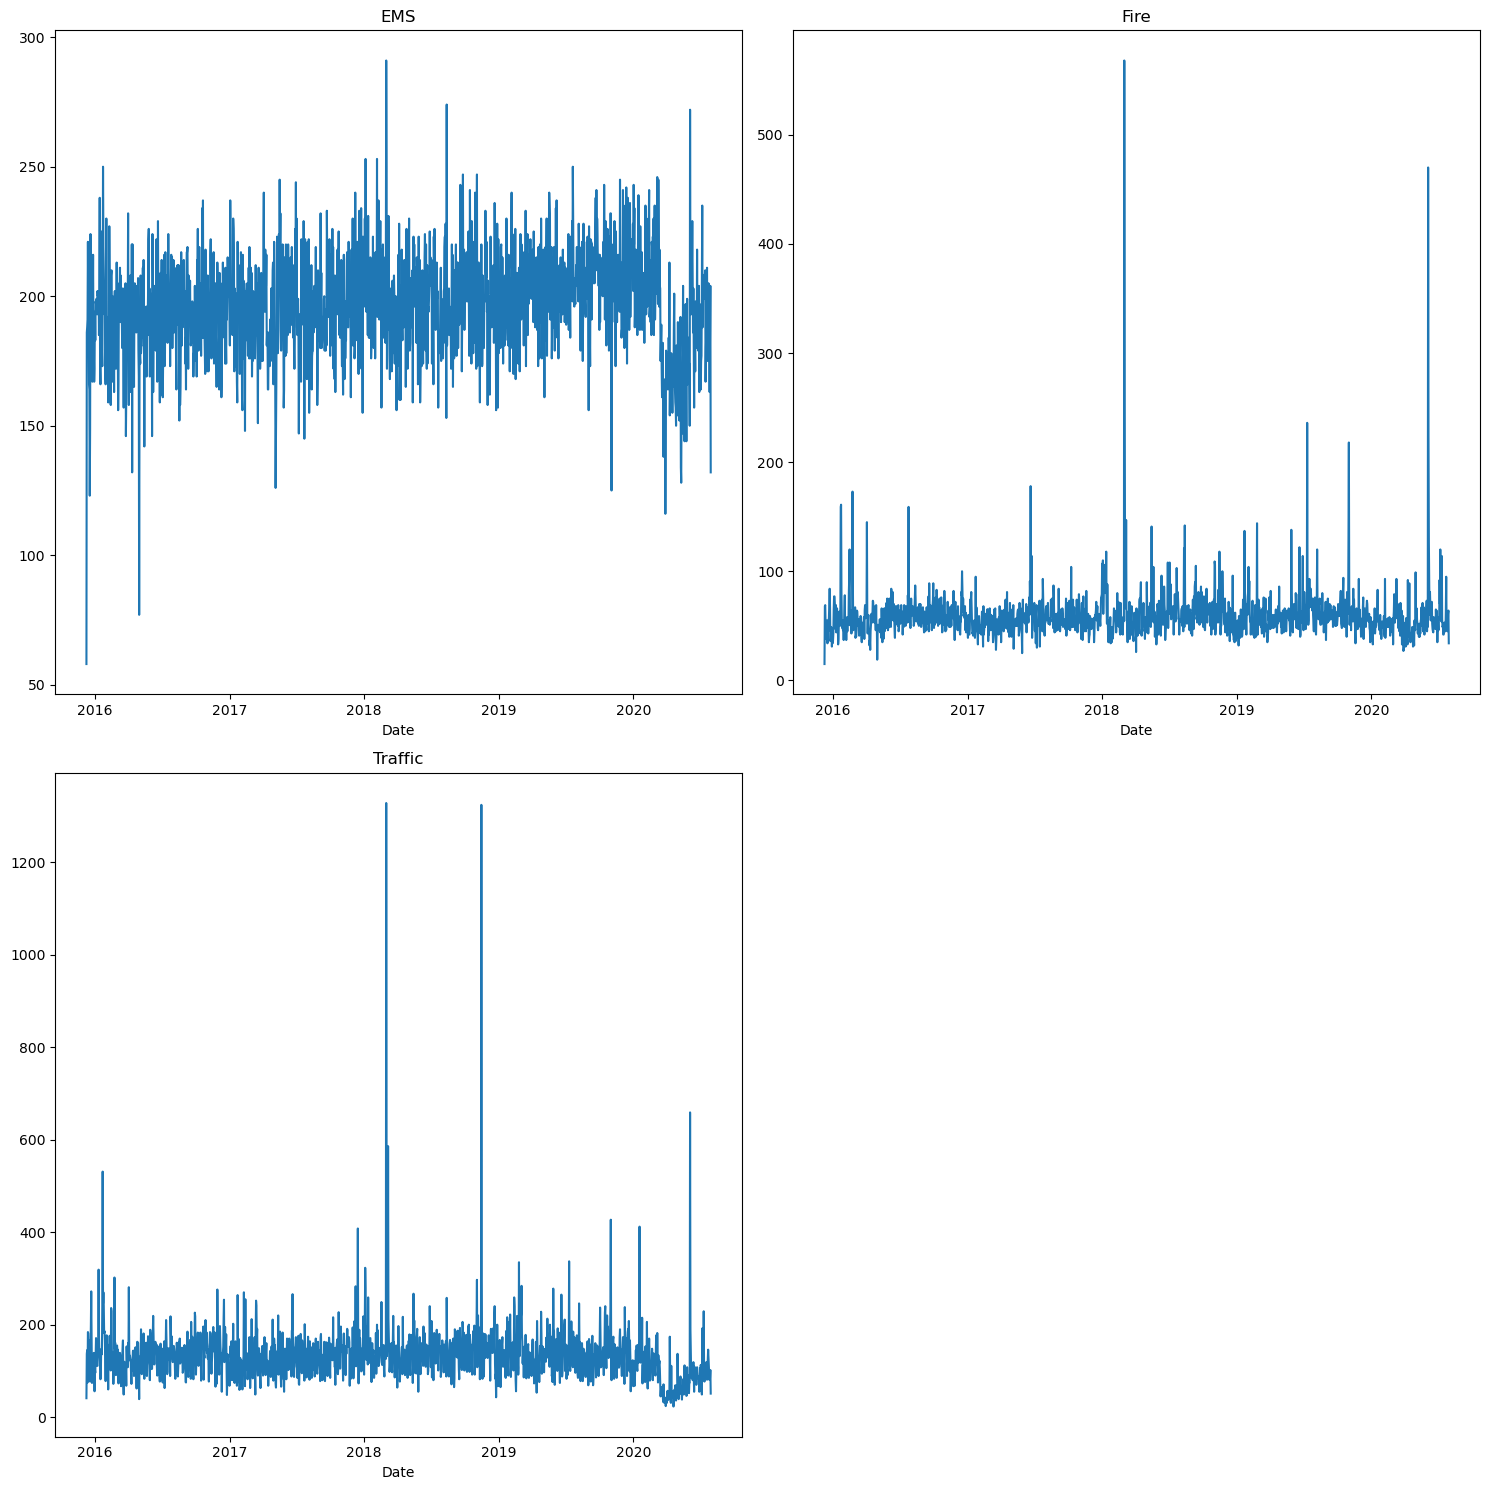

In [39]:
plt.figure(figsize=(15, 15))

for i, Reason in enumerate(df.Service.unique(), 1):
    plt.subplot(2, 2, i)
    df[df['Service']==Reason].groupby('Date').count()['Township'].plot()
    plt.title(Reason)
    plt.tight_layout()

In [40]:
# Next, let's do some heatmaps to get an idea of the magnitude of some time periods.
# First we'll do the day of the week and the hour.
# We can use unstack to view the rows and columns together.
dayHour = df.groupby(by=['DayOfWeek','Hour']).count()['Service'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


<Axes: xlabel='Hour', ylabel='DayOfWeek'>

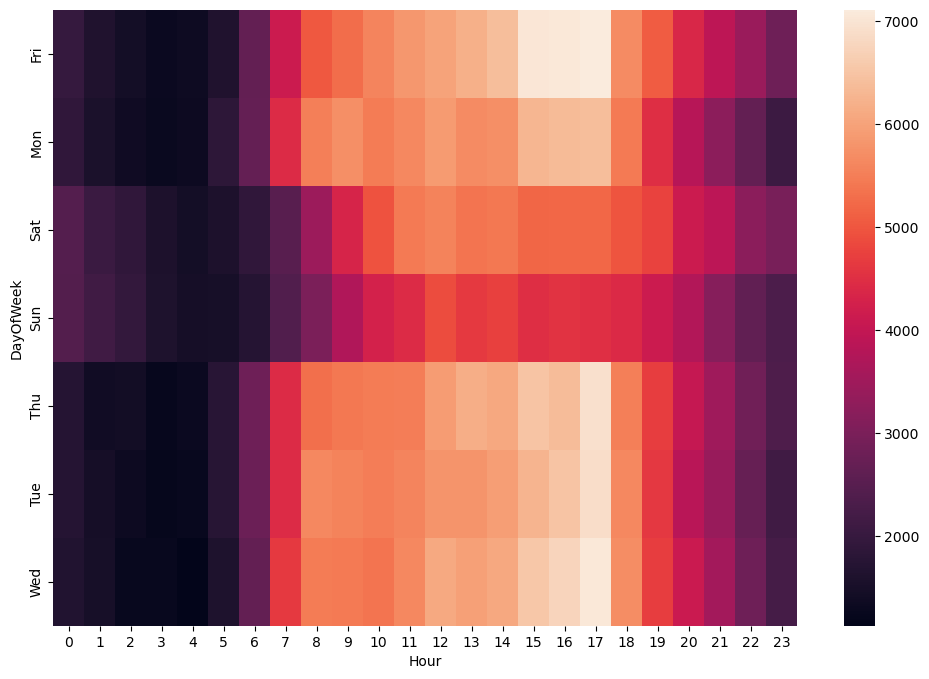

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(dayHour)

In [42]:
# Let's do the same for month instead of hour.
dayMonth = df.groupby(by=['DayOfWeek','Month']).count()['Service'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<Axes: xlabel='Month', ylabel='DayOfWeek'>

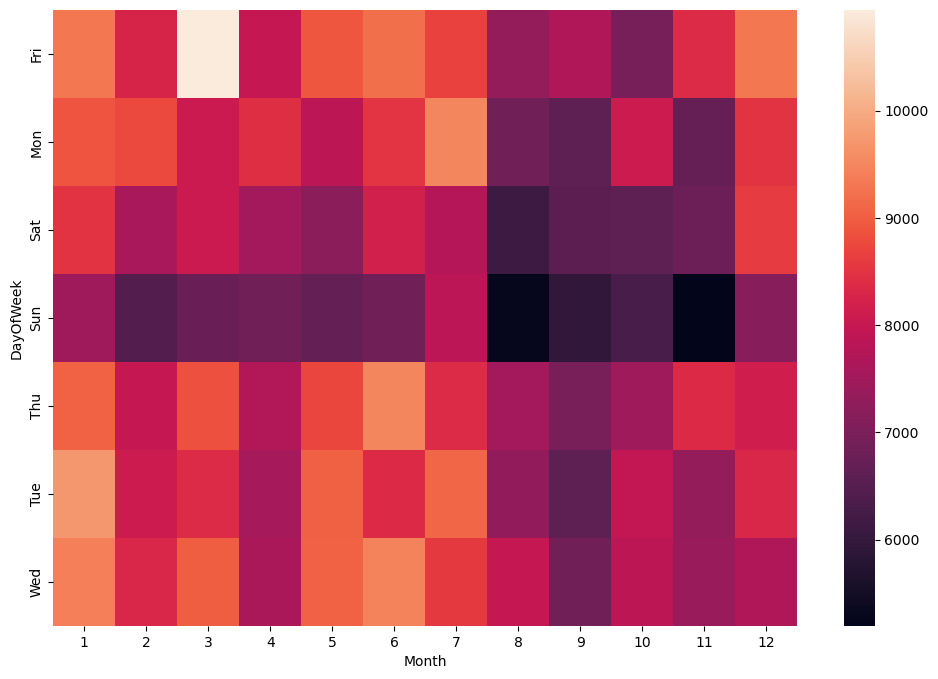

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(dayMonth)

Text(0.5, 0, 'Longitude')

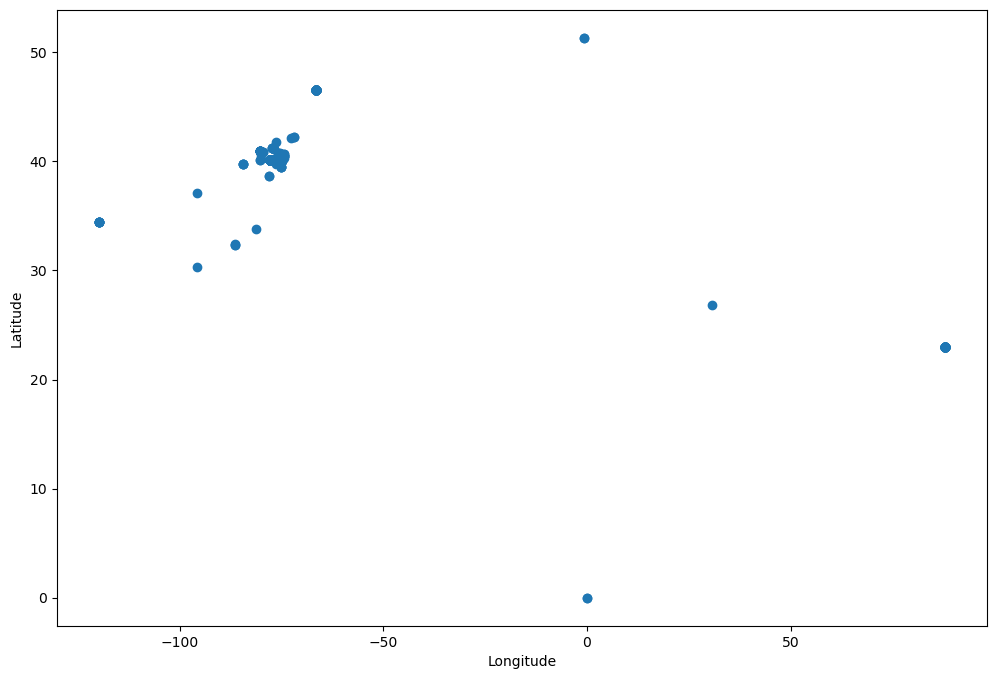

In [44]:
# Finally let's get an idea of where the emergencies took place by using a scatter plot with longitude and Latitude chart.
plt.figure(figsize=(12, 8))
plt.scatter(df.Longitude, df.Latitude)
plt.ylabel("Latitude")
plt.xlabel("Longitude")

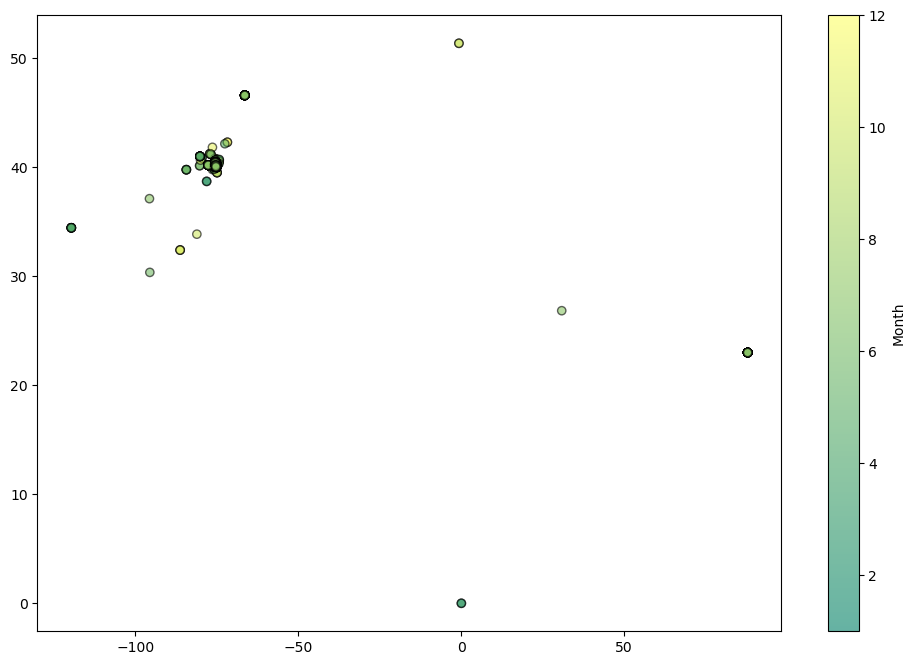

In [45]:
# If we want to, we can also gain insight as to when (DOW, Month, Hour) and where these occured by using a color map.
plt.figure(figsize=(12, 8))
plt.scatter(df.Longitude, df.Latitude, c=df.Month, cmap='summer', 
            edgecolor='black', linewidth=1, alpha=0.60)

cbar = plt.colorbar()
cbar.set_label('Month')

In [46]:
# With that, we now have visualizations and insights into our data that answers the questions we had.